# Impactos da Base de Aprendizagem

Para esse laboratório considere os seguintes classificadores:

- KNN
- Naïve Bayes
- Linear Discriminant Analysis
- Logistic Regression
- Perceptron

Considere também as base de treinamento (20000 exemplos) e teste (58646 exemplos), as quais contem 10 classes balanceadas e 132 características.

Escreva um breve relatório que:

1. Compare o desempenho desses classificadores em função da disponibilidade de base de treinamento. Alimente os classificadores com blocos de 1000 exemplos e plote num gráfico o desempenho na base de testes. Analise em qual ponto o tamanho da base de treinamento deixa de ser relevante.
1. Indique qual é o classificador que tem o melhor desempenho com poucos dados < 1000 exemplos.
1. Indique o classificador que tem melhor desempenho com todos os dados.
1. Indique o classificador mais rápido para classificar os 58k exemplos de teste.
1. Analise as matrizes de confusão. Os erros são os mesmos para todos os classificadores quando todos eles utlizam toda a base de teste?
O relatório reportando seus experimentos deve entregue em formato PDF.

IMPORTANTE:

1. Somente arquivos em PDF serão corrigidos. 
1. Respeite o prazo de entrega. O moodle não aceitará envios após a Data Limite.


In [20]:
# bibliotecas
import os
import time
import numpy as np

from sklearn import preprocessing
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
# carregar a base de treinamento
X_train_data, y_train_data = load_svmlight_file('./input/lab02/train.txt')

In [3]:
# fazer a normalizacao dos dados de treinamento
# X = X_train_data.toarray()
# scaler = preprocessing.StandardScaler()
# X_train = scaler.fit_transform(X)
X_train = X_train_data.toarray()
y_train = y_train_data

In [4]:
# carregar a base de teste
X_test_data, y_test = load_svmlight_file('./input/lab02/test.txt')
# fazer a normalizacao dos dados de teste
X_test = X_test_data.toarray()
# scaler = preprocessing.StandardScaler()
# X_test = scaler.fit_transform(X_test)

In [5]:
#import time
#start = time.time()
#stop = time.time()
#print(f"Training time: {stop - start}s")
## prints: Training time: 0.20307230949401855s

In [6]:
#kf = KFold(n_splits=59, random_state=0, shuffle=True)
#print(kf)
#for train_index, test_index in kf.split(X_test):
#    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    # X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]

In [58]:
def plot_cm(y_true, y_pred, figsize=(12,10), figure_name=''):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    if (len(figure_name) > 0):
        fig.savefig(figure_name)

In [59]:
# separar a base de dados em pedaços em porcentagem, dado um tamanho
def split_by_size(n):
    # if (n == 20000):
    #    X_train = X
    #    y_train = y_train_data
    #else:
    #    X_train, _, y_train, _ =  train_test_split(X, y_train_data, test_size=1-n/20000, random_state = 5)
    #return X_train, y_train
    return [X_train[:n], y_train_data[:n]]

In [60]:
def knn(X_train, y_train, X_test, number_samples, cm=False):
    X_train, y_train = split_by_size(number_samples)
    neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    neigh.fit(X_train, y_train)
    start = time.time()
    y_pred_knn = neigh.predict(X_test)
    stop = time.time()
    # cm = confusion_matrix(y_test, y_pred_knn)
    # print(cm)
    # print(f"Predicting time: {stop - start}s")
    if (cm):
        plot_cm(y_test, y_pred_knn, figure_name='confusion_knn.pdf')
    f1 = f1_score(y_test, y_pred_knn, average='weighted')
    recall = recall_score(y_test, y_pred_knn, average='weighted')
    accuracy = accuracy_score(y_test, y_pred_knn)
    return ['knn', number_samples, stop-start, accuracy, f1, recall]

In [61]:
def linear_discriminant(X_train, y_train, X_test, number_samples, cm=False):
    X_train, y_train = split_by_size(number_samples)
    lda = LDA(n_components=2)
    lda = lda.fit(X_train, y_train)
    X_lda = lda.transform(X_test)
    start = time.time()
    y_pred_lda = lda.predict(X_test)
    stop = time.time()
    f1 = f1_score(y_test, y_pred_lda, average='weighted')
    recall = recall_score(y_test, y_pred_lda, average='weighted')
    accuracy = accuracy_score(y_test, y_pred_lda)
    if (cm):
        plot_cm(y_test, y_pred_lda, figure_name='confusion_lda.pdf')
    return ['lda', number_samples, stop-start, accuracy, f1, recall]

In [62]:
def gaussian(X_train, y_train, X_test, number_samples, cm=False):
    X_train, y_train = split_by_size(number_samples)
    gnb = GaussianNB()    
    gnb = gnb.fit(X_train, y_train)
    start = time.time()
    y_pred_gnb = gnb.predict(X_test)
    stop = time.time()
    # print("Number of wrong predictions out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred_gnb).sum()))
    f1 = f1_score(y_test, y_pred_gnb, average='weighted')
    recall = recall_score(y_test, y_pred_gnb, average='weighted')
    accuracy = accuracy_score(y_test, y_pred_gnb)
    if (cm):
        plot_cm(y_test, y_pred_gnb, figure_name='confusion_naive.pdf')
    return ['naive_bayes', number_samples, stop-start, accuracy, f1, recall]

In [63]:
def logistic(X_train, y_train, X_test, number_samples, cm=False):
    X_train, y_train = split_by_size(number_samples)
    start = time.time()
    lr = LogisticRegression().fit(X_train,y_train)
    stop = time.time()
    y_pred_lr = lr.predict(X_test)
    f1 = f1_score(y_test, y_pred_lr, average='weighted')
    recall = recall_score(y_test, y_pred_lr, average='weighted')
    accuracy = accuracy_score(y_test, y_pred_lr)
    if (cm):
        plot_cm(y_test, y_pred_lr, figure_name='confusion_logistic.pdf')
    return ['logistic_regression', number_samples, stop-start, accuracy, f1, recall]

In [64]:
def perceptron(X_train, y_train, X_test, number_samples, cm=False):
    X_train, y_train = split_by_size(number_samples)
    perc = Perceptron().fit(X_train, y_train)
    start = time.time()
    y_pred_perc = perc.predict(X_test)
    stop = time.time()    
    f1 = f1_score(y_test, y_pred_perc, average='weighted')
    recall = recall_score(y_test, y_pred_perc, average='weighted')
    accuracy = accuracy_score(y_test, y_pred_perc)
    if (cm):
        plot_cm(y_test, y_pred_perc, figure_name='confusion_perceptron.pdf')
    return ['perceptron', number_samples, stop-start, accuracy, f1, recall]

In [13]:
def run():    
    results = []
    classifiers = ['naive_bayes', 'lda', 'logistic_regression', 'perceptron', 'knn']
    # classifiers = ['naive_bayes']
    for classifier in classifiers:
        for number_samples in range(1000, 20001, 1000):
            if classifier == 'knn':
                results.append(knn(X_train, y_train, X_test, number_samples))
            elif classifier == 'naive_bayes':
                results.append(gaussian(X_train, y_train, X_test, number_samples))
            elif classifier == 'lda':
                results.append(linear_discriminant(X_train, y_train, X_test, number_samples))
            elif classifier == 'logistic_regression':
                results.append(logistic(X_train, y_train, X_test, number_samples))
            elif classifier == 'perceptron':
                results.append(perceptron(X_train, y_train, X_test, number_samples))

    header = ['Classifier', 'Number samples', 'Time', 'accuracy_score', 'f1_score', 'recall_score']
    pd.DataFrame(results).to_csv('results.csv', header=header, decimal='.', index=False, sep=',', float_format='%.4f') 

In [14]:
run()

/home/marc/.virtualenvs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/marc/.virtualenvs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

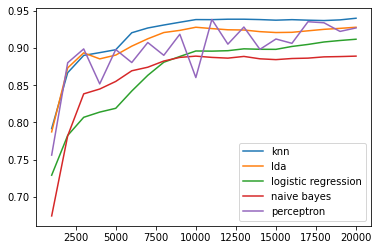

In [18]:
results = pd.read_csv('results_1.csv')

dataframes = []

for classifier in results.groupby(['Classifier']):
    #print(classifier[1]['Classifier'])
    result = pd.concat([classifier[1]['Number samples'], classifier[1]['accuracy_score']], axis=1, keys=['Number samples', 'accuracy_score'])
    #print(type(classifier[1]))
    # display(result)
    dataframes.append(result)

fig = plt.figure()

for frame in dataframes:
    plt.plot(frame['Number samples'], frame['accuracy_score'])

plt.legend(['knn', 'lda', 'logistic regression', 'naive bayes', 'perceptron'])

plt.xlim = (0,20000)
plt.ylim = (0,1)

plt.savefig('grafico01.pdf')

plt.show()

In [56]:
def run_20000():    
    results = []
    classifiers = ['naive_bayes', 'lda', 'logistic_regression', 'perceptron', 'knn']
    # classifiers = ['naive_bayes']
    for classifier in classifiers:
        for number_samples in range(20000, 20001, 1000):
            if classifier == 'knn':
                results.append(knn(X_train, y_train, X_test, number_samples, cm=True))
            elif classifier == 'naive_bayes':
                results.append(gaussian(X_train, y_train, X_test, number_samples, cm=True))
            elif classifier == 'lda':
                results.append(linear_discriminant(X_train, y_train, X_test, number_samples, cm=True))
            elif classifier == 'logistic_regression':
                results.append(logistic(X_train, y_train, X_test, number_samples, cm=True))
            elif classifier == 'perceptron':
                results.append(perceptron(X_train, y_train, X_test, number_samples, cm=True))

    header = ['Classifier', 'Number samples', 'Time', 'accuracy_score', 'f1_score', 'recall_score']
    pd.DataFrame(results).to_csv('results.csv', header=header, decimal='.', index=False, sep=',', float_format='%.4f') 

/home/marc/.virtualenvs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


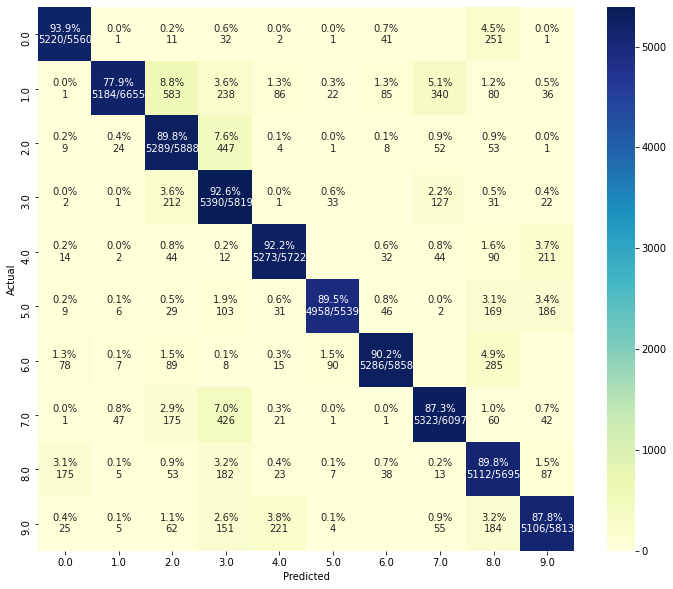

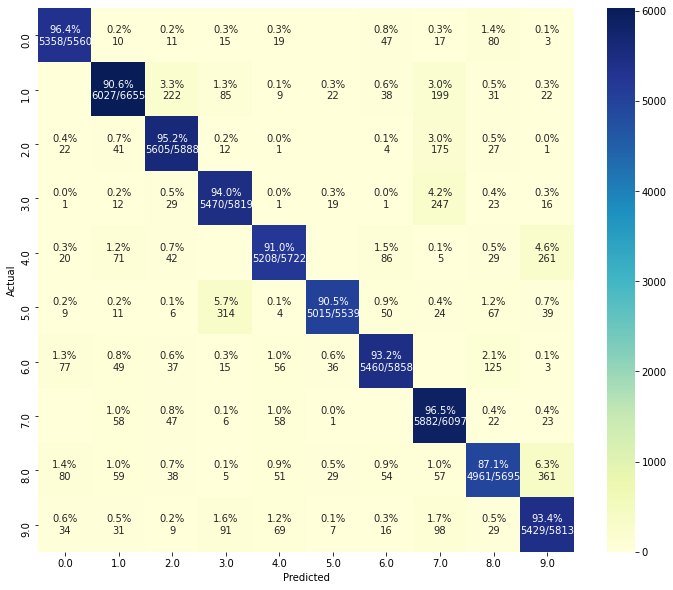

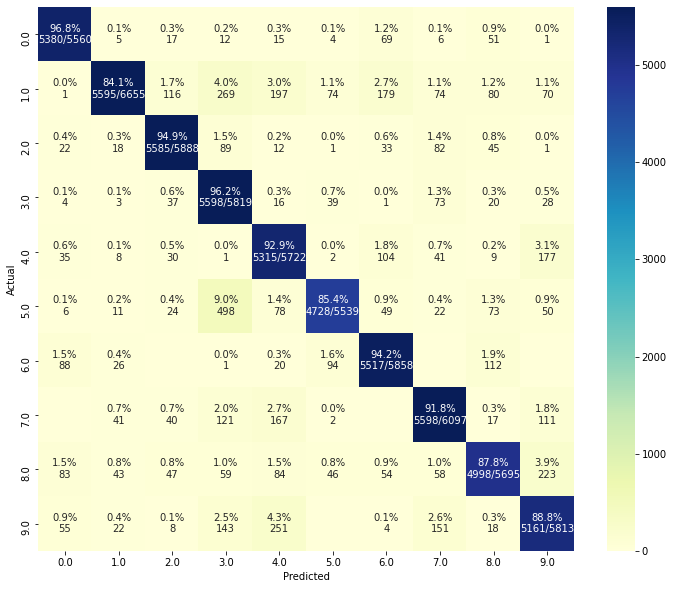

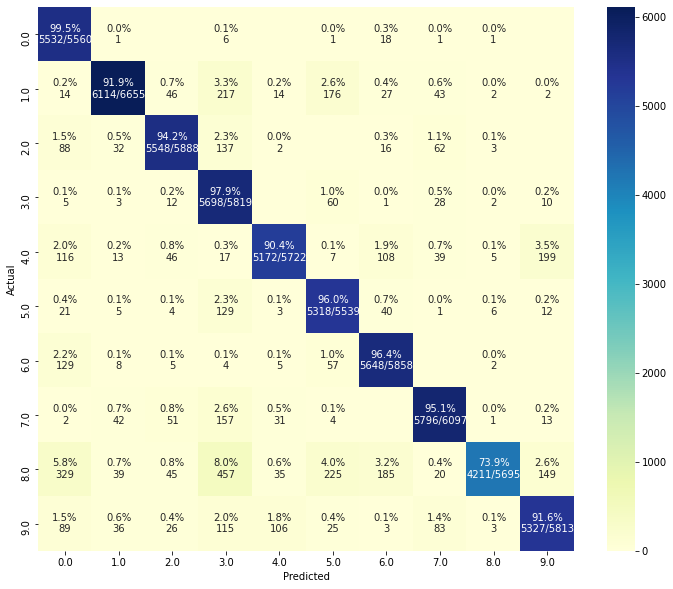

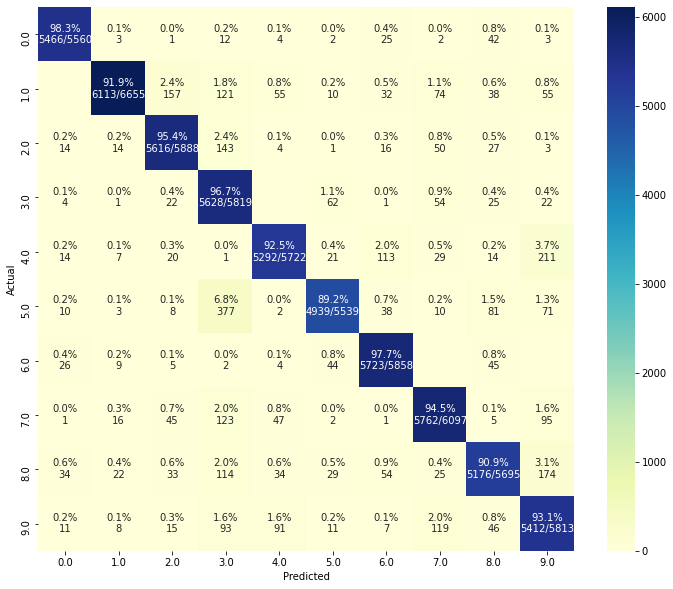

In [65]:
run_20000()

In [46]:
results.groupby(['Classifier'])['Time'].mean()


Classifier
knn                    73.853510
lda                     0.024255
logistic_regression     1.124245
naive_bayes             0.564165
perceptron              0.016205
Name: Time, dtype: float64